In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
print(device)

cuda:0


In [0]:
########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].
# .. note::
#     If running on Windows and you get a BrokenPipeError, try setting
#     the num_worker of torch.utils.data.DataLoader() to 0.

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################
# Let us show some of the training images, for fun.


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

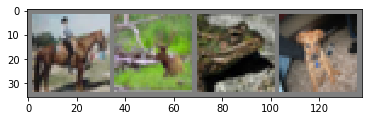

horse  deer  frog   dog


In [0]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
########################################################################
# 2. Define a Convolutional Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).




class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 10, 5)
        self.conv3 = nn.Conv2d(10, 16, 5)
        self.fc1 = nn.Linear(16 * 20 * 20, 450)
        self.fc2 = nn.Linear(450, 150)
        self.fc3 = nn.Linear(150, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 16 * 20 * 20)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [0]:
########################################################################
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=6400, out_features=450, bias=True)
  (fc2): Linear(in_features=450, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=10, bias=True)
)


In [0]:
param1 = get_n_params(net)
print(param1)

2955592


In [0]:
########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize.
lossy_loss = []
for epoch in range(20):  # loop over the dataset multiple times
    loss_values = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            loss_values.append(running_loss / 2000)
            running_loss = 0.0
    
    lossy_loss.append(np.mean(np.array(loss_values)))

print('Finished Training')

[1,  2000] loss: 2.197
[1,  4000] loss: 1.876
[1,  6000] loss: 1.733
[1,  8000] loss: 1.621
[1, 10000] loss: 1.574
[1, 12000] loss: 1.490
[2,  2000] loss: 1.436
[2,  4000] loss: 1.382
[2,  6000] loss: 1.385
[2,  8000] loss: 1.363
[2, 10000] loss: 1.323
[2, 12000] loss: 1.285
[3,  2000] loss: 1.193
[3,  4000] loss: 1.206
[3,  6000] loss: 1.192
[3,  8000] loss: 1.157
[3, 10000] loss: 1.186
[3, 12000] loss: 1.170
[4,  2000] loss: 1.013
[4,  4000] loss: 1.021
[4,  6000] loss: 1.022
[4,  8000] loss: 1.025
[4, 10000] loss: 1.029
[4, 12000] loss: 1.039
[5,  2000] loss: 0.815
[5,  4000] loss: 0.850
[5,  6000] loss: 0.880
[5,  8000] loss: 0.875
[5, 10000] loss: 0.896
[5, 12000] loss: 0.920
[6,  2000] loss: 0.628
[6,  4000] loss: 0.671
[6,  6000] loss: 0.702
[6,  8000] loss: 0.750
[6, 10000] loss: 0.762
[6, 12000] loss: 0.747
[7,  2000] loss: 0.471
[7,  4000] loss: 0.514
[7,  6000] loss: 0.540
[7,  8000] loss: 0.591
[7, 10000] loss: 0.592
[7, 12000] loss: 0.628
[8,  2000] loss: 0.345
[8,  4000] 

Text(0.5, 1.0, 'Loss History vs # of Epochs')

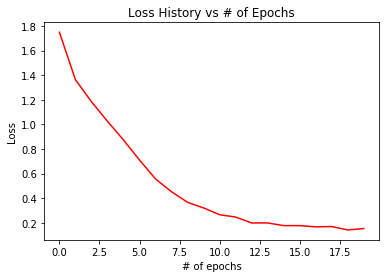

In [0]:
plt.plot(np.array(lossy_loss), 'r')
plt.xlabel('# of epochs')
plt.ylabel('Loss')
plt.title('Loss History vs # of Epochs')

In [0]:
########################################################################
# Let's quickly save our trained model:

PATH = './cifar_net_4.pth'
torch.save(net.state_dict(), PATH)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 training images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 training images: 96 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 94 %
Accuracy of   car : 94 %
Accuracy of  bird : 96 %
Accuracy of   cat : 95 %
Accuracy of  deer : 98 %
Accuracy of   dog : 95 %
Accuracy of  frog : 98 %
Accuracy of horse : 97 %
Accuracy of  ship : 98 %
Accuracy of truck : 95 %


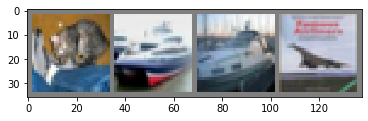

GroundTruth:    cat  ship  ship plane


In [0]:
########################################################################
# See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
# for more details on saving PyTorch models.
#
# 5. Test the network on the test data
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# We have trained the network for 2 passes over the training dataset.
# But we need to check if the network has learnt anything at all.
#
# We will check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
#
# Okay, first step. Let us display an image from the test set to get familiar.

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
########################################################################
# Next, let's load back in our saved model (note: saving and re-loading the model
# wasn't necessary here, we only did it to illustrate how to do so):

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
########################################################################
# Okay, now let us see what the neural network thinks these examples above are:

outputs = net(images)

In [0]:
########################################################################
# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck  ship  ship plane


In [0]:

########################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [0]:
########################################################################
# That looks way better than chance, which is 10% accuracy (randomly picking
# a class out of 10 classes).
# Seems like the network learnt something.
#
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 65 %
Accuracy of  bird : 38 %
Accuracy of   cat : 37 %
Accuracy of  deer : 56 %
Accuracy of   dog : 40 %
Accuracy of  frog : 68 %
Accuracy of horse : 58 %
Accuracy of  ship : 74 %
Accuracy of truck : 60 %
